# Chapter 4

In [2]:
import numpy as np

## 4.8

In [3]:
class BernoulliBandit:
    # accepts a list of K >= 2 floats, each lying in [0,1]
    def __init__ (self, means, seed=541):
        self.num_of_arms = len(means)
        assert self.num_of_arms >= 2, "Number of arms must be >= 2!"

        self.arm_means = means
        self.best_arm_idx = np.argmax(means)
        self.best_arm_mean = np.max(means)
        self.seed = seed
        self.rng = np.random.default_rng(seed)
        self.pulled_arm_history = []
        self.pulled_arm_mean_history = []
        self.reward_history = []

    # Function should return the number of arms
    def K(self):
        return self.num_of_arms

    # Accepts a parameter 0 <= a <= K-1 and returns the
    # realisation of random variable X with P(X = 1) being
    # the mean of the (a+1) th arm .
    def pull(self, a):
        pulled_arm_mean = self.arm_means[a]
        reward = self.rng.choice([0, 1], p=[1 - pulled_arm_mean, pulled_arm_mean])

        self.pulled_arm_history.append(a)
        self.pulled_arm_mean_history.append(pulled_arm_mean)
        self.reward_history.append(reward)
        return reward

    # Returns the regret incurred so far.
    def regret(self):
        random_regret = len(self.reward_history) * self.best_arm_mean - np.sum(self.reward_history)
        pseudo_regret = len(self.reward_history) * self.best_arm_mean - np.sum(self.pulled_arm_mean_history)
        return {"random": random_regret, "pseudo": pseudo_regret}

In [4]:
two_arm = BernoulliBandit([0.3, 0.6])

In [5]:
two_arm.K()

2

In [6]:
two_arm.pull(0)

1

In [7]:
two_arm.regret()

(-0.4, 0.3)

## 4.9

In [8]:
def FollowTheLeader(bandit, n, seed=541):
    # implement the Follow-the-Leader algorithm by replacing
    # the code below that just plays the first arm in every round

    rng = np.random.default_rng(seed)
    
    K = bandit.K()

    reward_history = {}

    # pull each arm once
    for a in range(K):
        reward_history[a] = [bandit.pull(a)]

    for t in range(K, n):

        # find the leader arm 
        leader = -1
        leader_score = -np.inf
        for a in range(K):
            candidate_score = np.mean(reward_history[a])
            if candidate_score == leader_score:
                leader = rng.choice([leader, a])
            elif candidate_score > leader_score:
                leader = a
                leader_score = candidate_score

        # pull the leader arm
        reward_history[leader].append(bandit.pull(leader))

## 4.12

In [9]:
regret_log = []

for i in range(1000):
    Bbandit_instance = BernoulliBandit([0.5, 0.6], seed=i)
    FollowTheLeader(Bbandit_instance, 100)
    regret_log.append(Bbandit_instance.regret()[1]) # extract the pseudo regret

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_1504\2490749085.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


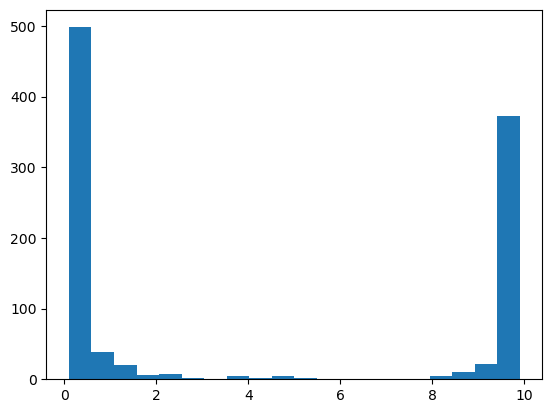

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(regret_log, bins=20)
fig.show()

There are many simulations with regrets around 10. This means the algorithm kept picking the suboptimal arm after the initial exploration stage.

## 4.13

In [11]:
avg_regret = []
regret_err = []
for n in range(100, 1001, 100):
    regret_log = []

    for i in range(1000):
        Bbandit_instance = BernoulliBandit([0.5, 0.6], seed=i)
        FollowTheLeader(Bbandit_instance, n)
        regret_log.append(Bbandit_instance.regret()[1]) # extract the pseudo regret

    avg_regret.append(np.mean(regret_log))
    regret_err.append(np.std(regret_log) / np.sqrt(1000))

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_1504\915499089.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


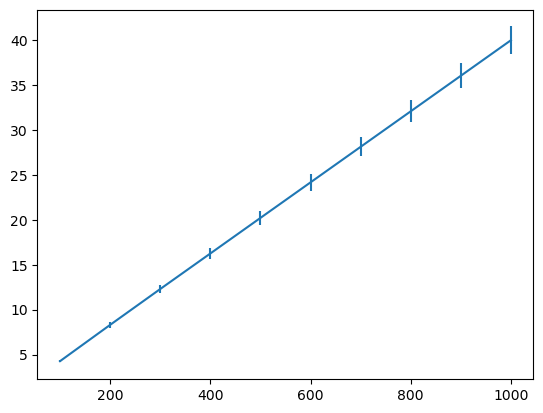

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.errorbar(range(100, 1001, 100), avg_regret, yerr=regret_err)
fig.show()

It's not a good algorithm since the regret grows linearly.